# Gráficos e Estatísticas

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind


In [2]:
charts = pd.read_csv("newish.csv")
charts

,Unnamed: 0,rank,previous_week,artist,album,label,weeks_on_chart,calendar_week,year,country
0,0,1,1,Rui Veloso,O concerto acústico,Virgin,8,1,2004,PT
1,1,2,3,Robbie Williams,Live Summer 2003,Chrysalis,14,1,2004,GB
2,2,3,2,Tribalistas,Tribalistas,Emi,42,1,2004,BR
3,3,4,4,Linkin Park,Live In Texas,Wb,7,1,2004,US
4,4,5,6,Tony Carreira,Ao vivo no pavilhao atlantico,Espacial,22,1,2004,PT
...,...,...,...,...,...,...,...,...,...,...
24805,24805,26,35,Pink Floyd,The Wall,Warner,64,52,2019,GB
24806,24806,27,32,António Variações,O melhor de António Variações,Warner,23,52,2019,PT
24807,24807,28,22,João Pedro Pais,Confidências (de um homem vulgar),Sony Music,10,52,2019,PT
24808,24808,29,23,Camila Cabello,Romance,Sony Music,3,52,2019,US


In [3]:
charts = charts.drop(['Unnamed: 0'], axis=1)
charts

,rank,previous_week,artist,album,label,weeks_on_chart,calendar_week,year,country
0,1,1,Rui Veloso,O concerto acústico,Virgin,8,1,2004,PT
1,2,3,Robbie Williams,Live Summer 2003,Chrysalis,14,1,2004,GB
2,3,2,Tribalistas,Tribalistas,Emi,42,1,2004,BR
3,4,4,Linkin Park,Live In Texas,Wb,7,1,2004,US
4,5,6,Tony Carreira,Ao vivo no pavilhao atlantico,Espacial,22,1,2004,PT
...,...,...,...,...,...,...,...,...,...
24805,26,35,Pink Floyd,The Wall,Warner,64,52,2019,GB
24806,27,32,António Variações,O melhor de António Variações,Warner,23,52,2019,PT
24807,28,22,João Pedro Pais,Confidências (de um homem vulgar),Sony Music,10,52,2019,PT
24808,29,23,Camila Cabello,Romance,Sony Music,3,52,2019,US


In [4]:
charts.loc[charts['artist'] == 'Pedro Abrunhosa & Comité Caviar', "artist"] = 'Pedro Abrunhosa'
charts.loc[charts['artist'] == 'Pedro Abrunhosa & Os Bandemónio', "artist"] = 'Pedro Abrunhosa'
charts.loc[charts['artist'] == "Maria Vasconcelos", "artist"] = "Maria de Vasconcelos"
charts.loc[charts['artist'] == "Richie Campbel", "artist"] = "Richie Campbell"

In [5]:
charts.loc[charts['country'] == 'PT'].to_csv("flourish.csv")

In [6]:
year2006 = charts.loc[charts['year'] == 2006][charts['country'] == "PT"]
year2006.groupby(["artist"])["album"].value_counts().sort_values(ascending=False)

/home/rute/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


artist                       album                                   
Paulo Gonzo                  Paulo Gonzo                                 44
Mariza                       Transparente                                34
Tony Carreira                Ao vivo no Coliseu                          30
André Sardet                 Acústico                                    24
D'ZRT                        Original                                    23
                                                                         ..
Alex Amaral e Sandra Coelho  Carnaval Mix                                 1
                             Carnaval Brasileiro - A loucura da folia     1
Adiafa                       Adiafa                                       1
A Naifa                      3 minutos antes de a maré encher             1
António Variações            O melhor de António Variações                1
Name: album, Length: 66, dtype: int64

In [7]:
year2006.artist.value_counts()#.groupby(["artist"]).value_counts().sort_values(ascending=False)

Mariza                         62
Paulo Gonzo                    44
D'ZRT                          44
Tony Carreira                  32
FF                             27
André Sardet                   24
Rita Guerra                    22
Mickael Carreira               19
Paco Bandeira                  17
José Cid                       16
Bebé Lilly                     16
Humanos                        16
Rouxinol Faduncho              15
António Variações              15
Rui Veloso                     12
Docemania                      12
Sara Tavares                   11
Santamaria                     10
Paulo de Carvalho              10
Marco Paulo                    10
The Gift                        9
Amália Rodrigues                9
Escolinha de música             9
Sérgio Godinho                  9
Luís Represas                   8
GNR                             7
Vitorino                        6
Anabela & Carlos Guilherme      5
Moonspell                       5
Rodrigo Leão  

## Proporção semanal música portuguesa vs. estrangeira

In [8]:
pt = charts.loc[charts['country'] == 'PT']
non_pt = charts.loc[charts['country'] != 'PT']

print(pt.count()/len(charts))
print(non_pt.count()/len(charts))

rank              0.478356
previous_week     0.445990
artist            0.478356
album             0.478356
label             0.478315
weeks_on_chart    0.478356
calendar_week     0.478356
year              0.478356
country           0.478356
dtype: float64
rank              0.521644
previous_week     0.454252
artist            0.520113
album             0.521644
label             0.519387
weeks_on_chart    0.521644
calendar_week     0.521644
year              0.521644
country           0.502177
dtype: float64


In [9]:
def share(x):
        return len([i for i in x if i == 'PT'])/len(x)


/home/rute/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Weekly evolution of ratio of Portuguese music on top 30 charts'}, xlabel='year,calendar_week'>

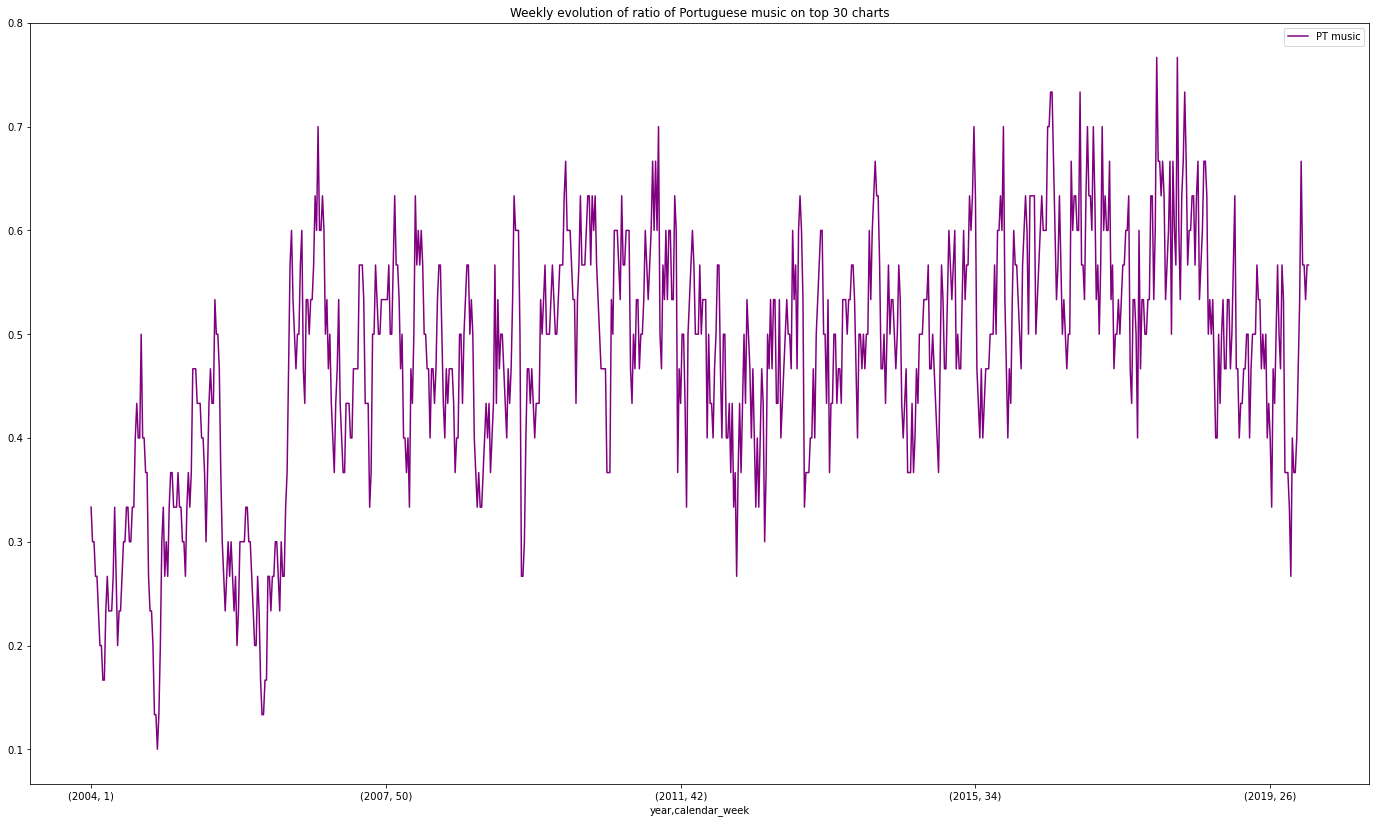

In [10]:
weekly_evo = charts.groupby(['year', "calendar_week"]).agg({'country' : share})
weekly_evo.rename(columns={'country':'PT music'}, inplace = True)

weekly_evo.plot(figsize=(24,14), title = "Weekly evolution of ratio of Portuguese music on top 30 charts", color="purple")

In [11]:
probs = charts.groupby(['year', "calendar_week"]).agg({'country' : share})
#probs.index[0]
probs

country
year calendar_week          
2004 1              0.333333
     2              0.300000
     3              0.300000
     4              0.266667
     5              0.266667
...                      ...
2019 48             0.566667
     49             0.566667
     50             0.533333
     51             0.566667
     52             0.566667

[827 rows x 1 columns]

In [12]:
probs.reset_index(inplace = True)
#probs.to_csv("probs.csv")
probs

,year,calendar_week,country
0,2004,1,0.333333
1,2004,2,0.300000
2,2004,3,0.300000
3,2004,4,0.266667
4,2004,5,0.266667
...,...,...,...
822,2019,48,0.566667
823,2019,49,0.566667
824,2019,50,0.533333
825,2019,51,0.566667


In [13]:
#probs["year"] = probs.index
#probs["calendar_week"] = probs.index

In [14]:
probs.rename(columns={'country':'PT_ratio'}, inplace = True)

In [15]:
probs["new"] = [i for i in range(len(probs["PT_ratio"]))]
probs

,year,calendar_week,PT_ratio,new
0,2004,1,0.333333,0
1,2004,2,0.300000,1
2,2004,3,0.300000,2
3,2004,4,0.266667,3
4,2004,5,0.266667,4
...,...,...,...,...
822,2019,48,0.566667,822
823,2019,49,0.566667,823
824,2019,50,0.533333,824
825,2019,51,0.566667,825


In [16]:
probs['new'] = probs.year.astype(str)+probs.calendar_week.astype(str)
probs['new'] = probs.new.astype(int)
probs.new

0       20041
1       20042
2       20043
3       20044
4       20045
        ...  
822    201948
823    201949
824    201950
825    201951
826    201952
Name: new, Length: 827, dtype: int64

In [17]:
probs["non-PT_ratio"] = [1-i for i in probs["PT_ratio"]]

In [18]:
probs.rename(columns={'foreign_ratio': "non-PT_ratio"}, inplace = True)

In [19]:
probs

,year,calendar_week,PT_ratio,new,non-PT_ratio
0,2004,1,0.333333,20041,0.666667
1,2004,2,0.300000,20042,0.700000
2,2004,3,0.300000,20043,0.700000
3,2004,4,0.266667,20044,0.733333
4,2004,5,0.266667,20045,0.733333
...,...,...,...,...,...
822,2019,48,0.566667,201948,0.433333
823,2019,49,0.566667,201949,0.433333
824,2019,50,0.533333,201950,0.466667
825,2019,51,0.566667,201951,0.433333


In [20]:
probs = probs[["new","year","calendar_week","PT_ratio","non-PT_ratio"]]

In [21]:
probs.corr()

,new,year,calendar_week,PT_ratio,non-PT_ratio
new,1.000000,0.008610,0.656571,-0.014900,0.014900
year,0.008610,1.000000,-0.000497,0.531973,-0.531973
calendar_week,0.656571,-0.000497,1.000000,-0.022775,0.022775
PT_ratio,-0.014900,0.531973,-0.022775,1.000000,-1.000000
non-PT_ratio,0.014900,-0.531973,0.022775,-1.000000,1.000000


### Heatmap

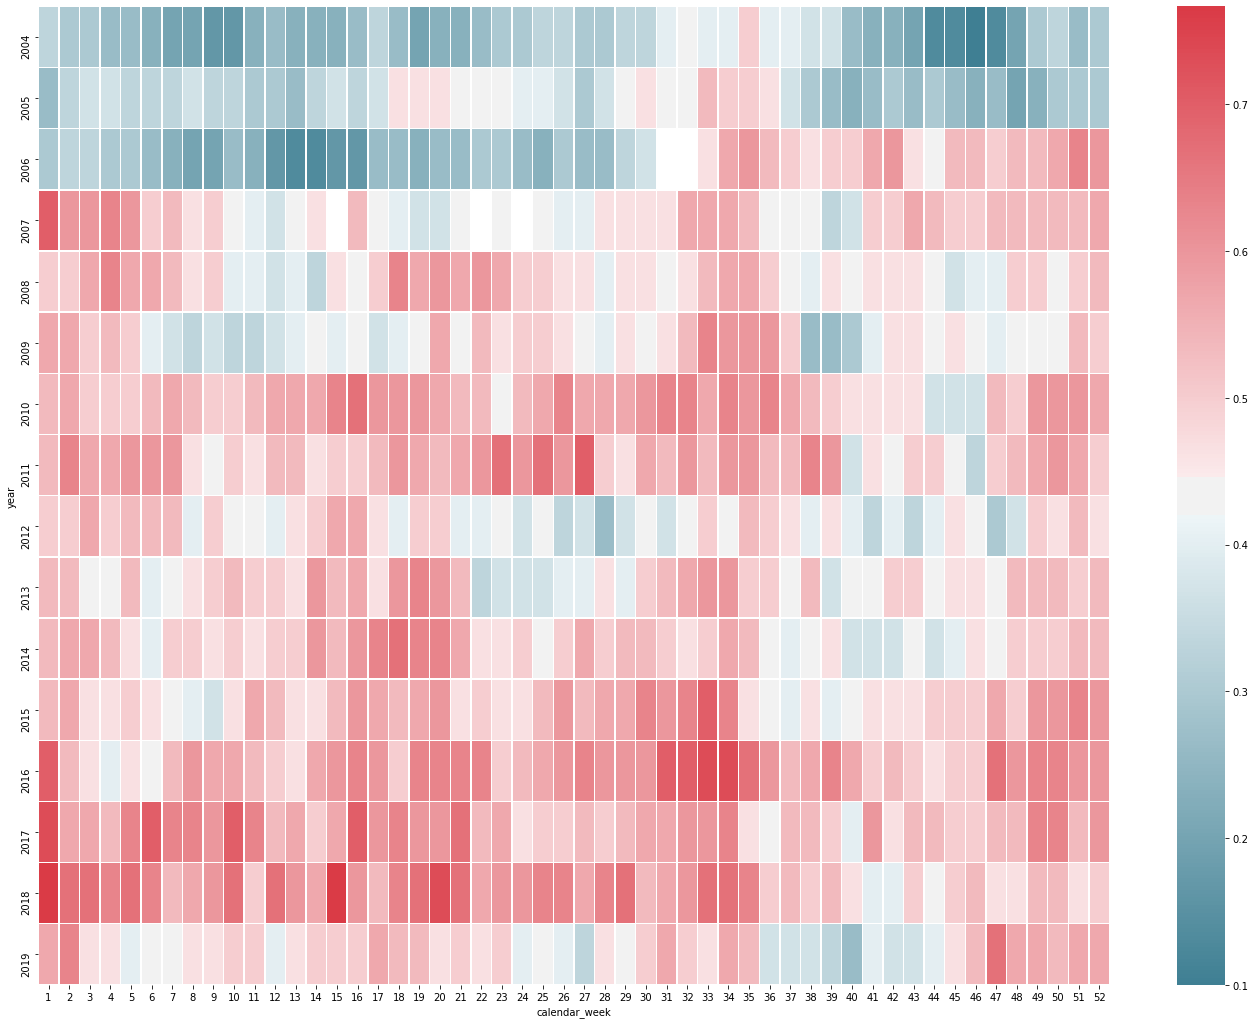

In [22]:
probs_heat = probs.pivot("year", "calendar_week", "PT_ratio")
fig, ax = plt.subplots(figsize=(24,18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(probs_heat, cmap=cmap, linewidths=.5, )

### Regresão linear por anos

In [23]:
Y = np.array(probs["PT_ratio"])
X = np.array(probs[['new']])
lm = LinearRegression()
model = lm.fit(X,Y)
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)
predictions  = lm.predict(X)   ## Y predict



Intercept:  0.4826341058503889
Coef:  [-2.52191343e-08]


In [24]:
slope, intercept, r_value, p_value, std_err = linregress(probs.PT_ratio, probs.year)
slope, intercept, r_value, p_value, std_err

(21.091900431816278,
 2001.4401985358809,
 0.5319729026935122,
 1.3159220778286914e-61,
 1.1688540017414175)

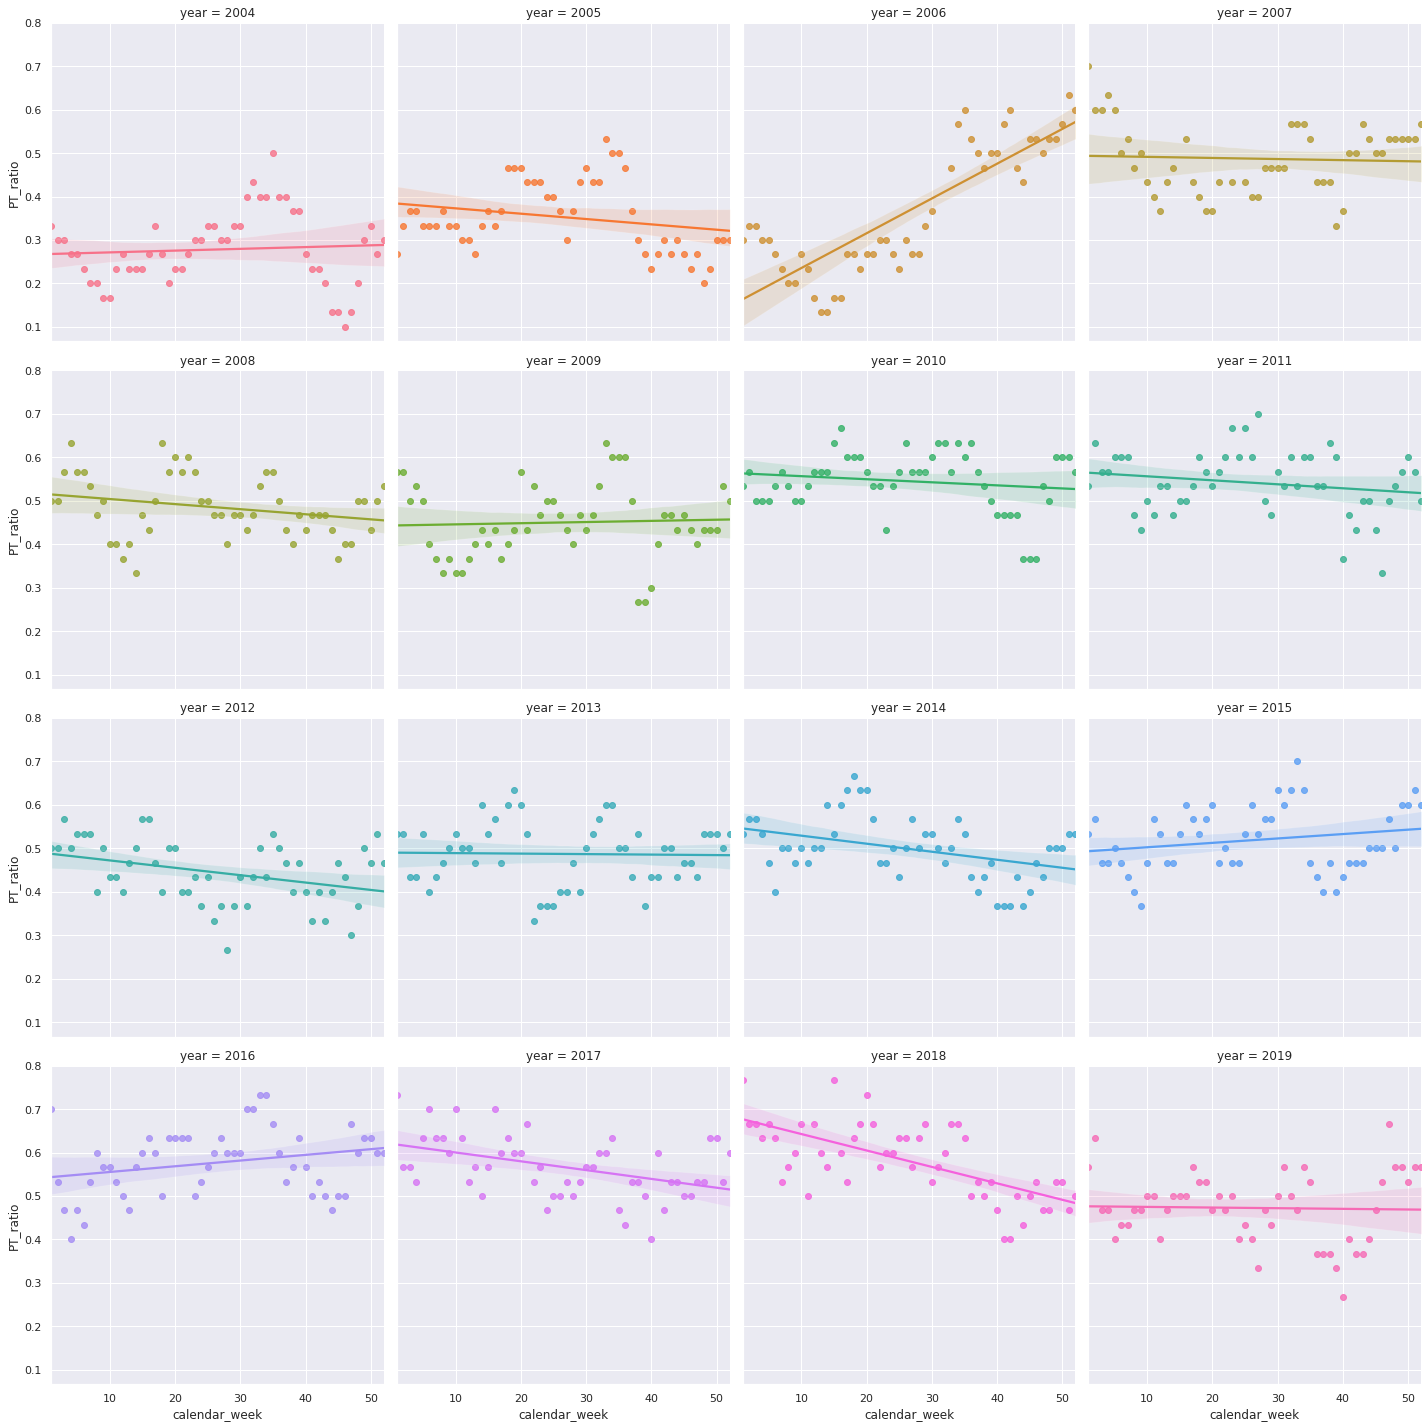

In [25]:
import seaborn as sns
sns.set()

g = sns.lmplot(x="calendar_week", y="PT_ratio", hue= "year", col="year", col_wrap=4, data=probs)


In [26]:
#ttest_1samp(probs.PT_ratio - probs["non-PT_ratio"], 0)

### Teste de T

In [27]:
tstats = []
for y in range(2004, 2020):
    ts = ttest_ind(probs.loc[probs.year == y, "PT_ratio"],probs.PT_ratio)
    tstats.append(ts[0])
    print(y, ' :', ttest_ind(probs.loc[probs.year == y, "PT_ratio"],probs.PT_ratio))

2004  : Ttest_indResult(statistic=-12.211323180822504, pvalue=8.747633356578009e-32)
2005  : Ttest_indResult(statistic=-7.683177135078013, pvalue=4.148382480328542e-14)
2006  : Ttest_indResult(statistic=-6.522000614008166, pvalue=1.1719311357459085e-10)
2007  : Ttest_indResult(statistic=0.5177500530034338, pvalue=0.6047636923447429)
2008  : Ttest_indResult(statistic=0.38364072316174286, pvalue=0.7013377364328585)
2009  : Ttest_indResult(statistic=-1.7293876688351963, pvalue=0.0840916108424263)
2010  : Ttest_indResult(statistic=4.079101702815935, pvalue=4.932664144462026e-05)
2011  : Ttest_indResult(statistic=3.8381078925862804, pvalue=0.00013288592854195918)
2012  : Ttest_indResult(statistic=-2.0910988049107755, pvalue=0.036806471711273075)
2013  : Ttest_indResult(statistic=0.5405892001870818, pvalue=0.5889280259128999)
2014  : Ttest_indResult(statistic=1.247379090836279, pvalue=0.2125915172748993)
2015  : Ttest_indResult(statistic=2.5026606525773185, pvalue=0.012507320871348716)
2016 

In [28]:
yearly_ratios = probs.groupby(["year"])["PT_ratio"].mean()
yearly_ratios

year
2004    0.278205
2005    0.352564
2006    0.366000
2007    0.487075
2008    0.484615
2009    0.450000
2010    0.544872
2011    0.541026
2012    0.444231
2013    0.487179
2014    0.498718
2015    0.519231
2016    0.576923
2017    0.566667
2018    0.580128
2019    0.472436
Name: PT_ratio, dtype: float64

<AxesSubplot:title={'center':'Proporção média anual de música portuguesa no Top Nacional de Álbuns, 2004-2019'}, xlabel='year'>

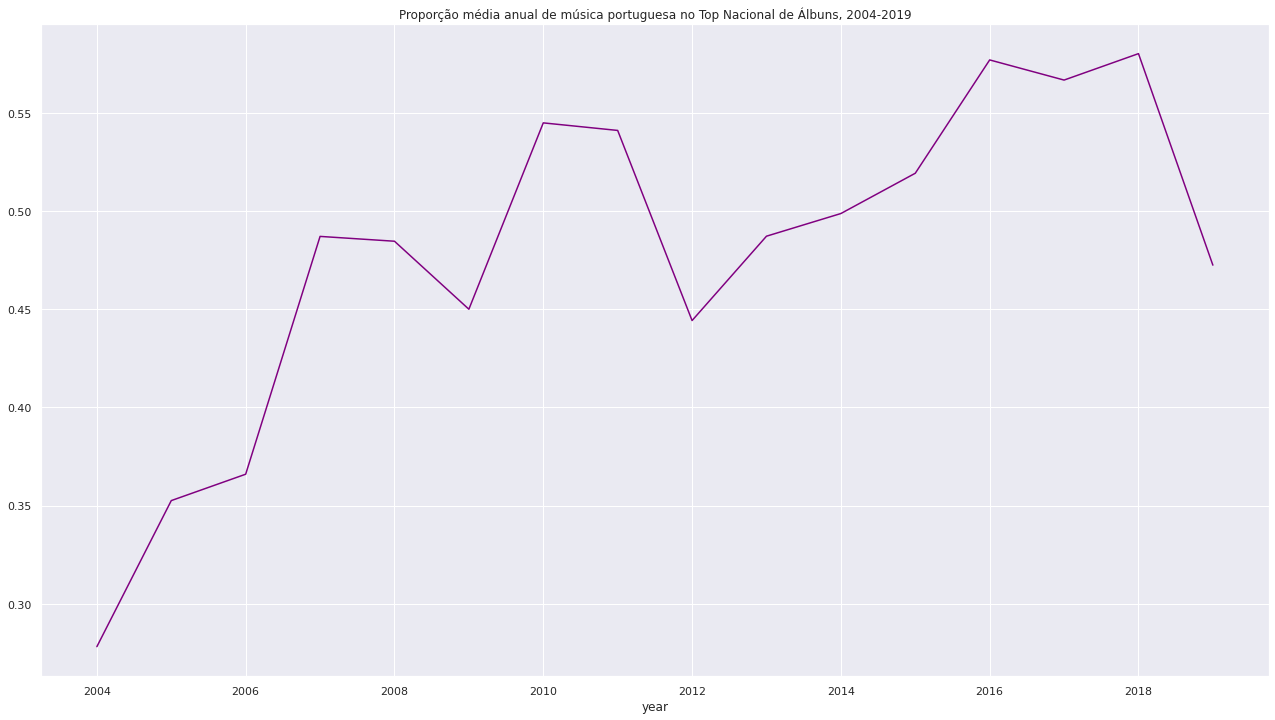

In [29]:
yearly_ratios.plot(figsize=(22,12), title = "Proporção média anual de música portuguesa no Top Nacional de Álbuns, 2004-2019", color="purple")

In [30]:
yearly_ratios = pd.DataFrame(yearly_ratios)
yearly_ratios['Música Portuguesa'] = yearly_ratios.apply(lambda x: x*100)
yearly_ratios['Música Estrangeira'] = yearly_ratios['Música Portuguesa'].apply(lambda x: 100-x)

In [31]:
yearly_ratios.to_csv('yearly_ratios.csv')
